# Principal Coordinates Analysis for MS2 Data Matrix (i.e. MS2 Feature Table)
 __Author:__ Alan K. Jarmusch <br>
 __Verion:__ 1.0 <br>
 __Date of Last Revision:__ 02-26-2018 <br>
 __Input:__ Data matrix with metadata (.csv), samples (row) by variables (columns). Data should be normalized but not centered.

In [3]:
suppressMessages(library(pcaMethods))
suppressMessages(library(ggplot2))
suppressMessages(library(grid))
suppressMessages(library(gridExtra))
suppressMessages(library(tidyr))

In [3]:
df <- read.csv('Tables_MS2/20180829_Immuno15Skin_FinalOccuranceTablewithMetadata.csv', header=TRUE)
head(df)

filename,unique_sample_ID,unique_sample_ID.1,ATTRIBUTE_sample_ID,ATTRIBUTE_Meds_number,ATTRIBUTE_prescribed_acetaminophen,ATTRIBUTE_prescribed_albuterol,ATTRIBUTE_prescribed_allopurinol,ATTRIBUTE_prescribed_amlodipine,ATTRIBUTE_prescribed_aspirin,⋯,Sulfamethizole,Timolol,Triphenyl.phosphate,Tris.2.butoxyethyl..phosphate,Tyr.Pro,Undecaethylene.glycol,Sulfachloropyridazine,Sulfamethoxazole,Syringaldehyde,Syringic.acid
AA3594_1_1_RA1_01_37666.mzXML,AA3594_1_1_RA1,AA3594_1_1,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
AA3594_1_10_RA10_01_37671.mzXML,AA3594_1_10_RA10,AA3594_1_10,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,1,1,1,0
AA3594_1_2_RA2_01_37667.mzXML,AA3594_1_2_RA2,AA3594_1_2,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,1,1
AA3594_1_3_RA3_01_37668.mzXML,AA3594_1_3_RA3,AA3594_1_3,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,1,1
AA3594_1_4_RA4_01_37669.mzXML,AA3594_1_4_RA4,AA3594_1_4,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,1,1
AA3594_1_5_diluted_RC5_01_37659.mzXML,AA3594_1_5_diluted,AA3594_1_5,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# scale options c("none", "pareto", "vector", "uv")
mypca <- pca(df[,-c(1:121)], center=TRUE, nPcs = 10, scale = "none")
df <- cbind(scores(mypca),df)
head(df)
loadings <- as.data.frame(loadings(mypca))
rownames <- rownames(loadings)
loadings <- cbind(rownames,loadings)
rownames(loadings) <- NULL
head(loadings)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,Sulfamethizole,Timolol,Triphenyl.phosphate,Tris.2.butoxyethyl..phosphate,Tyr.Pro,Undecaethylene.glycol,Sulfachloropyridazine,Sulfamethoxazole,Syringaldehyde,Syringic.acid
1.1686585,0.4689932,-0.05441028,1.0141744,-0.04049783,-1.043605518,-0.80880002,-0.28940741,0.10080194,0.4067095,⋯,0,0,0,0,1,0,1,0,0,1
0.0546593,0.6783061,0.77168275,0.5316901,-0.19376216,0.619490341,-1.02618829,-0.43576966,-0.29080525,-0.1363319,⋯,0,0,0,0,0,0,1,1,1,0
0.7682781,0.7168172,-0.06075319,1.0798988,-0.09367512,-1.011518485,-1.10584977,-0.13913116,0.04259552,0.1884106,⋯,0,0,0,0,1,0,1,0,1,1
1.3013259,0.3162874,0.22138696,0.7075682,-0.35325052,-0.936217818,-0.67579883,-0.15142415,0.17145798,-0.2632522,⋯,0,0,0,0,1,0,1,0,1,1
1.6046360,0.2002957,-0.02587765,1.2116166,0.20078709,-0.637232893,-0.58080360,-0.10269232,-0.08404425,-0.2396879,⋯,0,0,0,0,1,0,1,0,1,1
2.4080332,-0.7574507,-0.26978942,-0.1325860,0.18369933,-0.003073673,-0.02718837,0.04424499,0.01525510,-0.3695411,⋯,0,0,0,0,0,0,0,0,0,0


rownames,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
alpha.Cyclodextrin,0.007092692,-0.011370027,0.014543684,-0.0162285325,0.009193687,0.0005177392,-0.019078614,0.006645220,-0.003319274,0.017111021
alpha.Hexylcinnamaldehyde,0.062989168,-0.054042467,0.003348742,-0.0206724833,0.050774726,0.0012230253,0.045352152,-0.012755111,-0.006211716,0.026246823
Ionone,-0.006746283,0.010593203,0.021228052,-0.0235154687,-0.009969208,-0.0074346132,0.038434830,0.048853091,0.034820902,0.015995659
Catechin,-0.066802995,0.212789367,-0.109537137,0.1163289534,-0.093304102,-0.4177196264,0.073620423,0.008342168,-0.034510741,0.643296078
Secoisolariciresinol,0.004514080,0.004061129,0.009405115,0.0008661241,-0.011778893,-0.0066396840,-0.001579197,-0.010939815,-0.017139031,-0.001453439
X8.Hydroxy.5.9.11.14.17.eicosapentaenoic.acid,-0.004449046,0.023186207,0.040867861,0.0007389238,-0.004943508,-0.0640651095,-0.016259774,0.024459038,0.011299329,0.008706781


In [136]:
write.csv(df, "Tables_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_scores.csv", row.names=FALSE)

Saving 7.1 x 6.67 in image


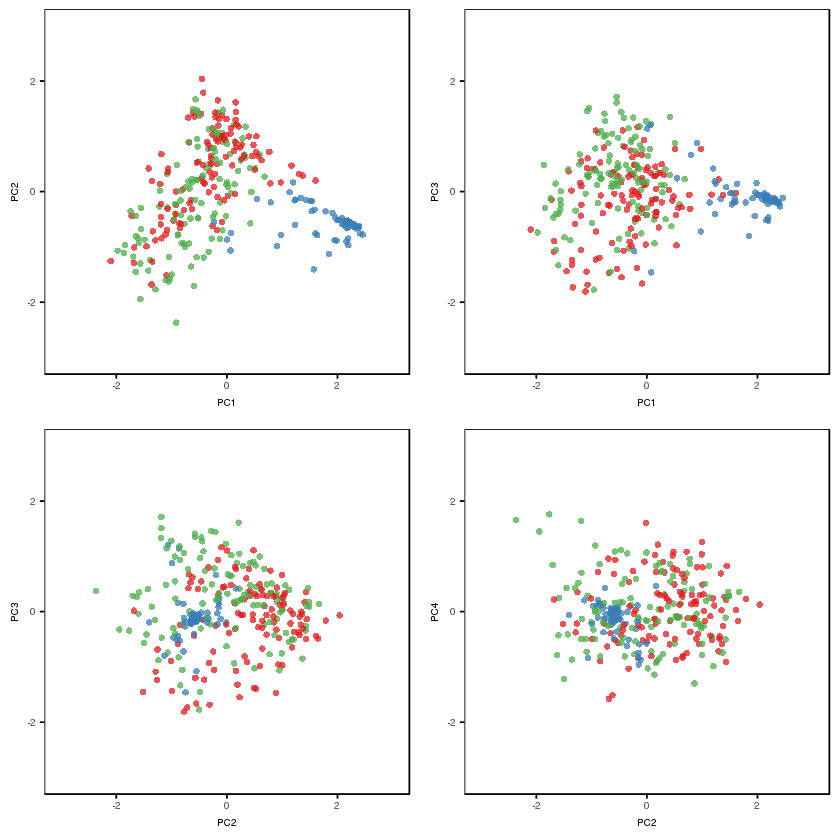

In [5]:
BODYSITE_score_1v2 <- ggplot(df, aes(PC1, PC2))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v2 <- BODYSITE_score_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_1v3 <- ggplot(df, aes(PC1, PC3))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v3 <- BODYSITE_score_1v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_2v3 <- ggplot(df, aes(PC2, PC3))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_2v3 <- BODYSITE_score_2v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_2v4 <- ggplot(df, aes(PC2, PC4))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_2v4 <- BODYSITE_score_2v4 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())


PCA_score <- grid.arrange(BODYSITE_score_1v2,BODYSITE_score_1v3,BODYSITE_score_2v3,BODYSITE_score_2v4,ncol=2, nrow=2)
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_Score.pdf", PCA_score, width=7.1, units="in", scale=1,useDingbats=FALSE)

In [6]:
BODYSITE_score_1v2 <- ggplot(df, aes(PC1, PC2))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v2 <- BODYSITE_score_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_Score_FIGURE.pdf", BODYSITE_score_1v2, width=3.25, units="in", scale=1,useDingbats=FALSE)

Saving 3.25 x 6.67 in image


Saving 7.1 x 6.67 in image


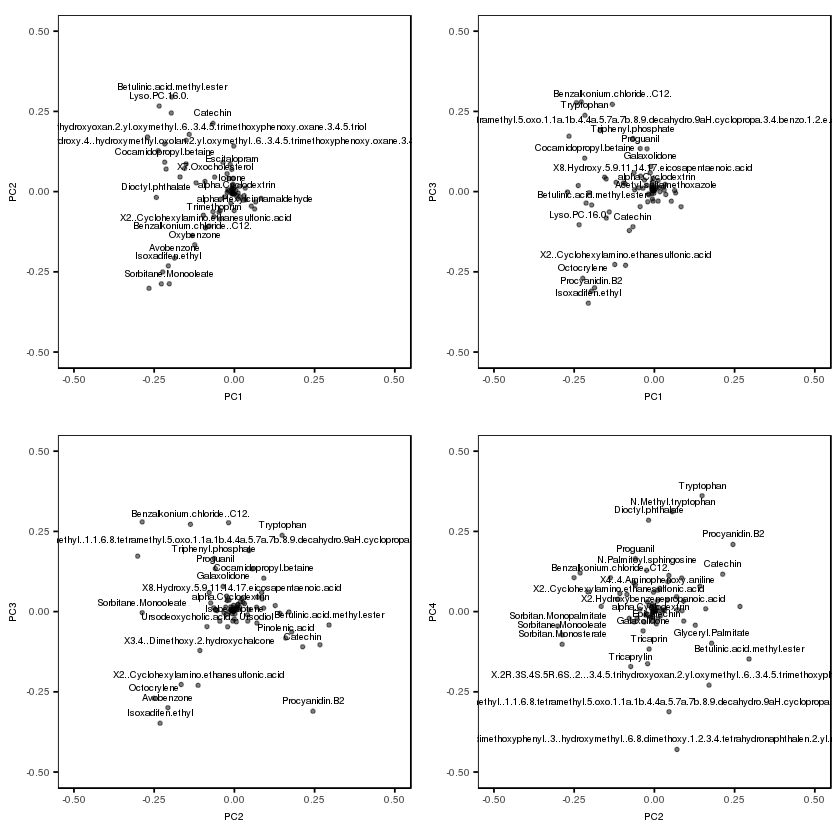

In [133]:
BODYSITE_loading_1v2 <- ggplot(loadings, aes(PC1, PC2, label=rownames))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_1v2 <- BODYSITE_loading_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_1v3 <- ggplot(loadings, aes(PC1, PC3, label=rownames))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_1v3 <- BODYSITE_loading_1v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_2v3 <- ggplot(loadings, aes(PC2, PC3, label=rownames))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_2v3 <- BODYSITE_loading_2v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_2v4 <- ggplot(loadings, aes(PC2, PC4, label=rownames))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_2v4 <- BODYSITE_loading_2v4 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())


PCA_loading <- grid.arrange(BODYSITE_loading_1v2,BODYSITE_loading_1v3,BODYSITE_loading_2v3,BODYSITE_loading_2v4,ncol=2, nrow=2)
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_Loading.pdf", PCA_loading, width=7.1, units="in", scale=1,useDingbats=FALSE)

,PCs,Variance,CumVariance
PC1,1,0.13420,0.13420
PC2,2,0.07591,0.21011
PC3,3,0.05745,0.26756
PC4,4,0.04720,0.31476
PC5,5,0.04329,0.35805
PC6,6,0.04289,0.40094


Saving 3.25 x 6.67 in image


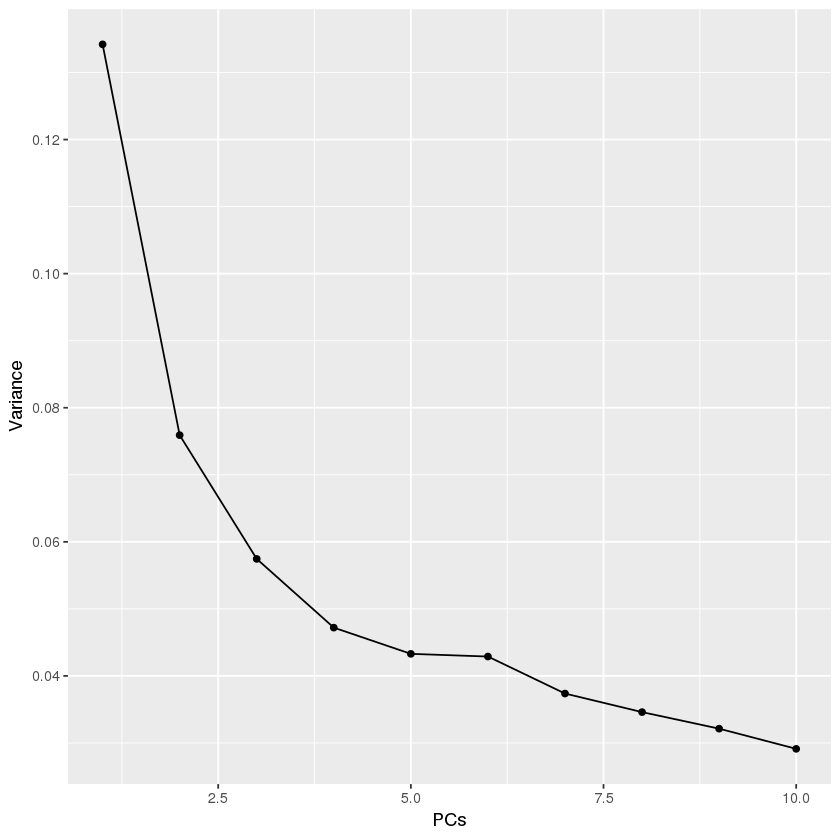

In [134]:
scree_KMFoff <- data.frame(PCs=c(1,2,3,4,5,6,7,8,9,10),
                Variance=mypca@R2,CumVariance=mypca@R2cum)
head(scree_KMFoff)
# Individual Variance
ggplot() +
  geom_line(data=scree_KMFoff, aes(x=PCs, y=Variance, group=1))+
  geom_point(data=scree_KMFoff, aes(x=PCs, y=Variance, group=1))
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_ScreePlot.pdf", width=3.25, units="in", scale=1,useDingbats=FALSE)

In [135]:
load <- mypca@loadings[order(abs(mypca@loadings[,1]), decreasing = TRUE),]
head(load)
write.csv(load[,(1:5)],"Tables_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_loadings.csv")

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Sorbitan.Monopalmitate,0.3949144,0.13649997,0.12416613,0.2247677,-0.16576293,-0.034693090,-0.039339984,0.01886474,0.003047398,0.12803746
Sorbitan.Monosterate,0.3549108,0.23968381,0.20728375,0.1394673,-0.17657639,-0.060670861,-0.003791734,0.07210136,-0.012499010,0.15864985
Sorbitane.Monooleate,0.3527315,-0.03042488,0.06836622,0.2876246,-0.07945625,0.090102936,0.003692847,-0.10003320,0.055721394,0.01299237
Octocrylene,0.3370667,-0.21783848,-0.11480585,-0.1885845,0.05807185,-0.155900884,-0.136649509,0.02830262,-0.140992354,-0.05673526
Isoxadifen.ethyl,0.3078321,-0.29928238,-0.14613930,-0.1101781,0.02484076,-0.117262308,-0.079031681,0.09201912,-0.214795482,-0.02870332
Avobenzone,0.2894622,-0.27266597,-0.13201822,-0.1150011,0.06965099,0.001904091,0.121085739,-0.03860246,-0.002185683,-0.05183632


# TIME

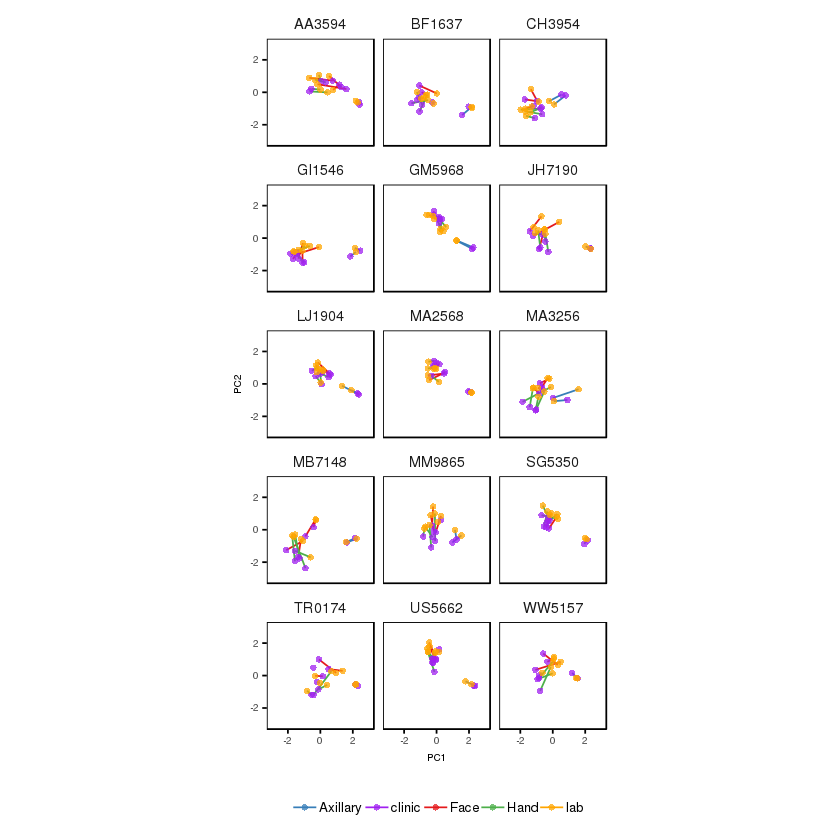

In [115]:
subject_1 <- ggplot(df, aes(PC1, PC2))+
    
    geom_line(aes(group=ATTRIBUTE_Body_Site, colour=ATTRIBUTE_Sample_Location_General_Text))+#, 
              #arrow = arrow(length = unit(0.1, "inches")))+
   
    geom_point(aes(colour=ATTRIBUTE_Visit), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8", "purple","#e41a1c","#4daf4a","orange")) +

    facet_wrap(~ATTRIBUTE_sample_ID, nrow = 5, ncol = 3)+
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
subject_1 <- subject_1 + coord_fixed(ratio=1) +
    theme(legend.position="bottom", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())
print(subject_1)
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_SubjectbyVisit.pdf", subject_1, width=7.1, height=10.5, units="in", scale=1, useDingbats=FALSE)

Saving 3.25 x 6.67 in image


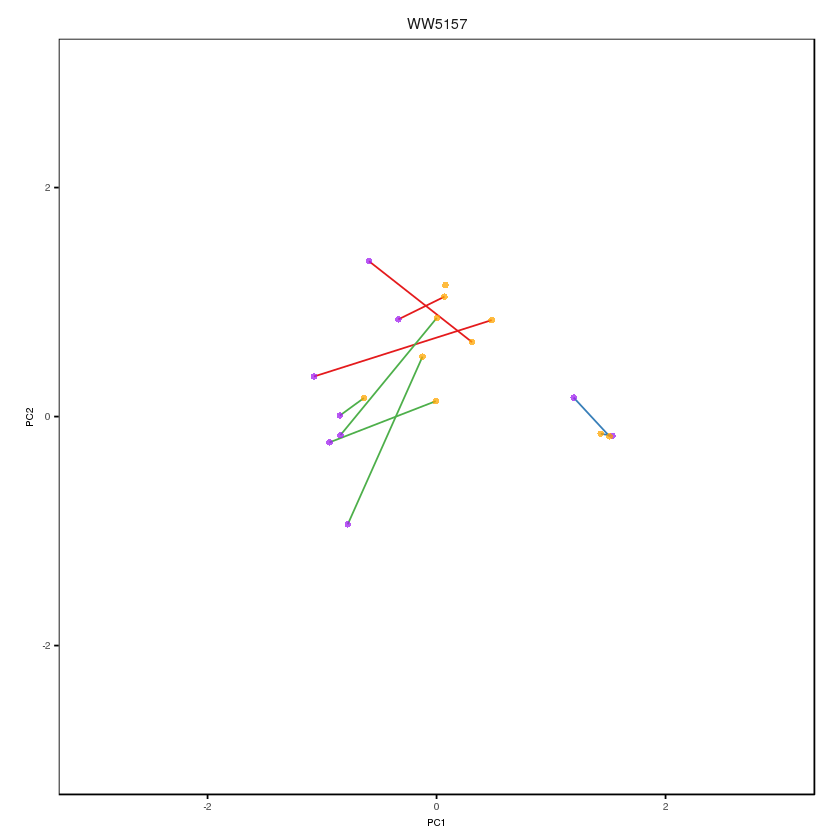

In [114]:
subject_1 <- ggplot(subset(df,df$ATTRIBUTE_sample_ID =="WW5157"), aes(PC1, PC2))+
    
    geom_line(aes(group=ATTRIBUTE_Body_Site, colour=ATTRIBUTE_Sample_Location_General_Text))+#, 
              #arrow = arrow(length = unit(0.1, "inches")))+
   
    geom_point(aes(colour=ATTRIBUTE_Visit), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#377eb8", "purple","#e41a1c","#4daf4a","orange")) +

    facet_wrap(~ATTRIBUTE_sample_ID)+
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
subject_1 <- subject_1 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())
print(subject_1)
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_SubjectbyVisit_FIGURE.pdf", subject_1, width=3.25, units="in", scale=1, useDingbats=FALSE)

Saving 7.1 x 6.67 in image


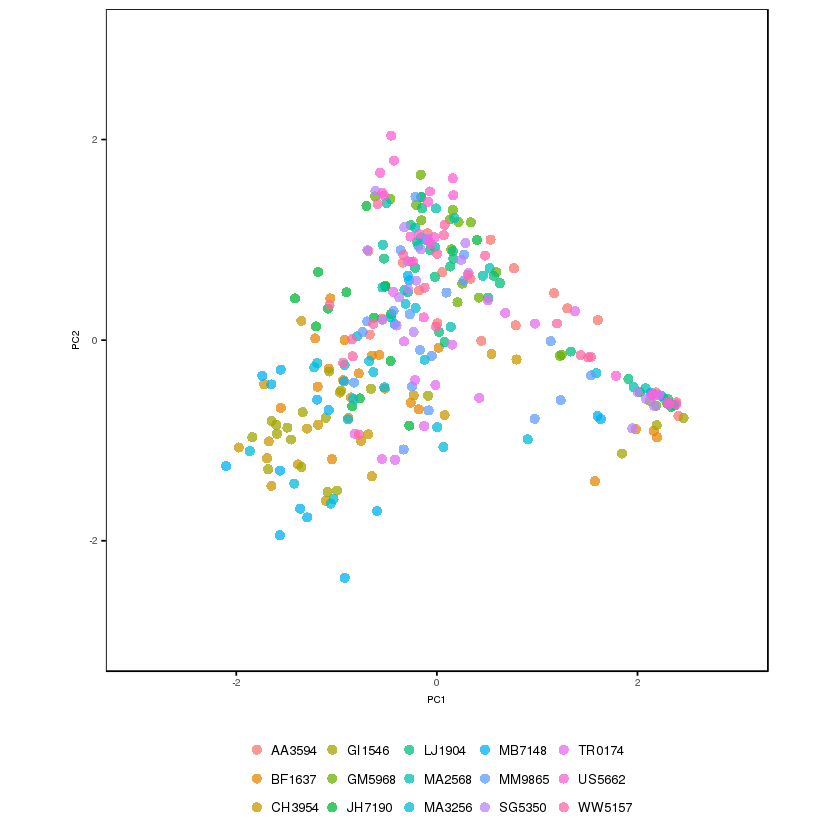

In [12]:
BODYSITE_score_1v2 <- ggplot(df, aes(PC1, PC2))+
    geom_point(aes(colour=factor(ATTRIBUTE_sample_ID)), pch=16, cex = 2.5, alpha=0.75) +
    #scale_color_manual(values= c("#e41a1c","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v2 <- BODYSITE_score_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="bottom", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

print(BODYSITE_score_1v2)
ggsave("Plots/20180702_Immunosuppressant15Skin_MS2_PCA_Score_BYSUBJECT.pdf", BODYSITE_score_1v2, width=7.1, units="in", scale=1)

Saving 7.1 x 6.67 in image


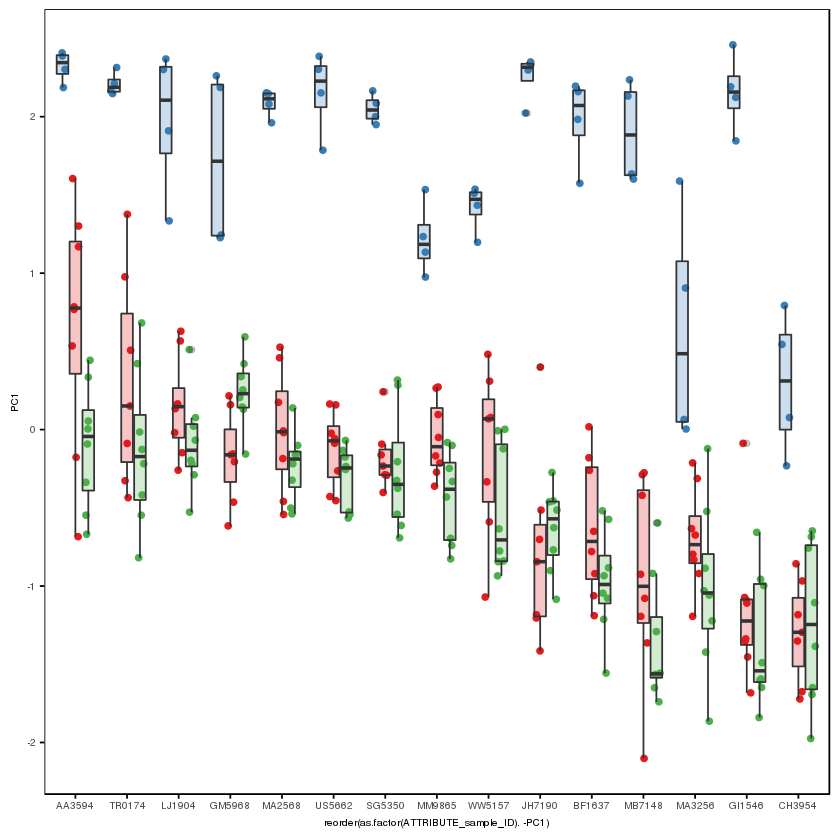

In [14]:
BODYSITE_score_1v2 <- ggplot(df, aes(reorder(as.factor(ATTRIBUTE_sample_ID), -PC1), PC1))+
    #geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    #scale_color_manual(values= c("#e41a1c","#4daf4a")) +
    geom_jitter(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)),position = position_jitterdodge())+
    scale_color_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +

    geom_boxplot(aes(fill=factor(ATTRIBUTE_Sample_Location_General_Text)), alpha=0.25) +
    scale_fill_manual(values= c("#377eb8","#e41a1c","#4daf4a")) +
    
    #xlim(-3,3) +
    #ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v2 <- BODYSITE_score_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

print(BODYSITE_score_1v2)
ggsave("Plots_MS2/20180831_Immunosuppressant15Skin_MS2_PCA_Subject_versus_PC1Score.pdf", BODYSITE_score_1v2, width=7.1, units="in", scale=1,useDingbats=FALSE)